# Ejercicio Gatos y perros
## Carga de librerías

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


## PARTE 1 - Preprocesamiento de datos

### Datos de entrenamiento

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset_chi/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 26 images belonging to 2 classes.


### Datos de prueba

In [11]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset_chi/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 14 images belonging to 2 classes.


## PARTE 2 - Construyendo la red neuronal convolucional
### Inicializando la red

Para leer de keras: https://keras.io/getting_started/

In [18]:
cnn = tf.keras.models.Sequential()

### PASO 1 - Convolución

In [19]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### PASO 2 - Pooling

In [20]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Agregando segunda capa

Segunda conbolución y segundo Pooling

In [13]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### PASO 3 - Flattening

In [21]:
cnn.add(tf.keras.layers.Flatten())

### PASO 4 - Full connection

In [22]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### PASO 5 - Output layer

In [23]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# PARTE 3 - Entrenando la red
## Compilando la red

In [24]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Entrenando la red con el set de entrenamiento y evaluando con el set de prueba

In [25]:
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
1/1 [==============================] - 0s 326ms/step - loss: 0.7182 - accuracy: 0.5000 - val_loss: 4.0054 - val_accuracy: 0.5000
Epoch 2/25
1/1 [==============================] - 0s 133ms/step - loss: 4.3066 - accuracy: 0.5000 - val_loss: 0.6108 - val_accuracy: 0.6429
Epoch 3/25
1/1 [==============================] - 0s 121ms/step - loss: 0.5905 - accuracy: 0.8462 - val_loss: 2.2162 - val_accuracy: 0.5000
Epoch 4/25
1/1 [==============================] - 0s 117ms/step - loss: 2.1342 - accuracy: 0.5000 - val_loss: 1.4303 - val_accuracy: 0.5000
Epoch 5/25
1/1 [==============================] - 0s 145ms/step - loss: 1.3626 - accuracy: 0.5000 - val_loss: 0.6547 - val_accuracy: 0.5714
Epoch 6/25
1/1 [==============================] - 0s 117ms/step - loss: 0.6321 - accuracy: 0.5769 - val_loss: 0.7992 - val_accuracy: 0.5000
Epoch 7/25
1/1 [==============================] - 0s 139ms/step - loss: 0.8253 - accuracy: 0.5000 - val_loss: 0.9574 - val_accuracy: 0.5000
Epoch 8/25
1/1 [====

# PARTE 4 - Realizando predicción

In [13]:
import numpy as np
from keras.preprocessing import image

def get_prediction(name = 'chi_o_muf_1.jpg'):
    test_image = image.load_img('dataset_chi/single_prediction/' + name, target_size = (64, 64))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = cnn.predict(test_image)
    print(result)
    training_set.class_indices
    if result[0][0] == 1:
        return 'muf'
    return 'chi'

In [14]:
print(get_prediction())

[[0.]]
chi


La matriz que retorna el método predict es de 1 x 1 y puede contener un 0 o 1.

In [17]:
for i in range(1,6):
    f_name = 'chi_o_muf_' + str(i) + '.jpg'
    print(f_name, 'is a', get_prediction(f_name))

[[0.]]
chi_o_muf_1.jpg is a chi
[[1.]]
chi_o_muf_2.jpg is a muf
[[1.]]
chi_o_muf_3.jpg is a muf
[[0.]]
chi_o_muf_4.jpg is a chi
[[0.]]
chi_o_muf_5.jpg is a chi


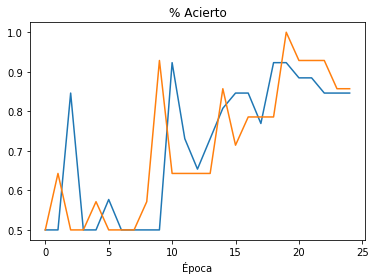

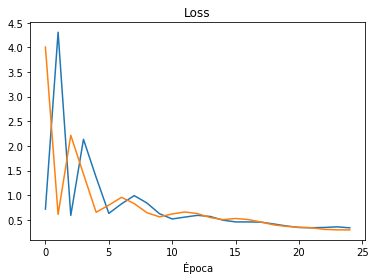

In [26]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('Época')
plt.show()